<a href="https://colab.research.google.com/github/karthikeyan0726/group_ML/blob/main/ML_Project_Thyroid_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/content/thyroid.csv")

In [4]:
df

,29,F,f,f.1,f.2,f.3,f.4,f.5,f.6,t,...,f.14,?.1,f.15,?.2,f.16,?.3,f.17,?.4,other,-[840801013]
0,29,F,f,f,f,f,f,f,f,f,...,t,128,f,?,f,?,f,?,other,-[840801014]
1,41,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,11,other,-[840801042]
2,36,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,26,other,-[840803046]
3,32,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,36,other,S[840803047]
4,60,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,26,other,-[840803048]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9166,56,M,f,f,f,f,f,f,f,f,...,t,64,t,0.83,t,77,f,?,SVI,-[870119022]
9167,22,M,f,f,f,f,f,f,f,f,...,t,91,t,0.92,t,99,f,?,SVI,-[870119023]
9168,69,M,f,f,f,f,f,f,f,f,...,t,113,t,1.27,t,89,f,?,SVI,I[870119025]
9169,47,F,f,f,f,f,f,f,f,f,...,t,75,t,0.85,t,88,f,?,other,-[870119027]


In [5]:
df.drop("other",axis=1,inplace=True)

In [6]:
feature_cols = ["age",
                "sex",
                "on_thyroxine",
                "query_on_thyroxine",
                "on_antithyroid_medication",
                "sick",
                "pregnant",
                "thyroid_surgery",
                "I131_treatment",
                "query_hypothyroid",
                "query_hyperthyroid",
                "lithium",
                "goitre",
                "tumor",
                "hypopituitary",
                "psych",
                "TSH measured",
                "TSH",
                "T3_measured",
                "T3",
                "TT4_measured",
                "TT4",
                "T4U_measured",
                "T4U",
                "FTI_measured",
                "FTI",
                "TBG_measured",
                "TBG",
               "target"]

In [7]:
df.columns = feature_cols

In [8]:
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,target
0,29,F,f,f,f,f,f,f,f,f,...,1.9,t,128,f,?,f,?,f,?,-[840801014]
1,41,F,f,f,f,f,f,f,f,f,...,?,f,?,f,?,f,?,t,11,-[840801042]
2,36,F,f,f,f,f,f,f,f,f,...,?,f,?,f,?,f,?,t,26,-[840803046]
3,32,F,f,f,f,f,f,f,f,f,...,?,f,?,f,?,f,?,t,36,S[840803047]
4,60,F,f,f,f,f,f,f,f,f,...,?,f,?,f,?,f,?,t,26,-[840803048]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9166,56,M,f,f,f,f,f,f,f,f,...,?,t,64,t,0.83,t,77,f,?,-[870119022]
9167,22,M,f,f,f,f,f,f,f,f,...,?,t,91,t,0.92,t,99,f,?,-[870119023]
9168,69,M,f,f,f,f,f,f,f,f,...,?,t,113,t,1.27,t,89,f,?,I[870119025]
9169,47,F,f,f,f,f,f,f,f,f,...,?,t,75,t,0.85,t,88,f,?,-[870119027]


# Splitting target

## Now we can check that the target columns as many categorial names with some indicate numbers so going to split with the respective features

### thyroid.names file content

The diagnosis consists of a string of letters indicating diagnosed conditions.
A diagnosis "-" indicates no condition requiring comment.  A diagnosis of the
form "X|Y" is interpreted as "consistent with X, but more likely Y".  The
conditions are divided into groups where each group corresponds to a class of
comments.

		Letter	Diagnosis
		------	---------

	hyperthyroid conditions:

		A	hyperthyroid
		B	T3 toxic
		C	toxic goitre
		D	secondary toxic

	hypothyroid conditions:

		E	hypothyroid
		F	primary hypothyroid
		G	compensated hypothyroid
		H	secondary hypothyroid

	binding protein:

		I	increased binding protein
		J	decreased binding protein

	general health:

		K	concurrent non-thyroidal illness

	replacement therapy:

		L	consistent with replacement therapy
		M	underreplaced
		N	overreplaced

	antithyroid treatment:

		O	antithyroid drugs
		P	I131 treatment
		Q	surgery

	miscellaneous:

		R	discordant assay results
		S	elevated TBG
		T	elevated thyroid hormones

In experiments with an earlier version of this archive, decision trees were
derived for the most frequent classes of comments, namely

	hyperthyroid conditions (A, B, C, D)
	hypothyroid conditions (E, F, G, H)
	binding protein (I, J)
	general health (K)
	replacement therapy (L, M, N)
	discordant results (R)

In [9]:
target = df.target
create = target.str.split('([A-Za-z]+)', expand=True)
create = create[1]
target = create.replace({None:'Z'}) #here z is none type
df.target = target

In [10]:
df.target.unique()

array(['Z', 'S', 'F', 'AK', 'R', 'I', 'M', 'N', 'G', 'K', 'A', 'KJ', 'L',
       'MK', 'Q', 'J', 'C', 'O', 'LJ', 'H', 'D', 'GK', 'MI', 'P', 'FK',
       'B', 'GI', 'GKJ', 'OI', 'E'], dtype=object)

In [11]:
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,target
0,29,F,f,f,f,f,f,f,f,f,...,1.9,t,128,f,?,f,?,f,?,Z
1,41,F,f,f,f,f,f,f,f,f,...,?,f,?,f,?,f,?,t,11,Z
2,36,F,f,f,f,f,f,f,f,f,...,?,f,?,f,?,f,?,t,26,Z
3,32,F,f,f,f,f,f,f,f,f,...,?,f,?,f,?,f,?,t,36,S
4,60,F,f,f,f,f,f,f,f,f,...,?,f,?,f,?,f,?,t,26,Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9166,56,M,f,f,f,f,f,f,f,f,...,?,t,64,t,0.83,t,77,f,?,Z
9167,22,M,f,f,f,f,f,f,f,f,...,?,t,91,t,0.92,t,99,f,?,Z
9168,69,M,f,f,f,f,f,f,f,f,...,?,t,113,t,1.27,t,89,f,?,I
9169,47,F,f,f,f,f,f,f,f,f,...,?,t,75,t,0.85,t,88,f,?,Z


### Now we want to impute the null values but this case the null values are marked as in '?' so we can do some tricks

In [12]:
df = df.replace(['?'],np.nan)

In [13]:
df.isnull().sum()

age                             0
sex                           307
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
sick                            0
pregnant                        0
thyroid_surgery                 0
I131_treatment                  0
query_hypothyroid               0
query_hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           842
T3_measured                     0
T3                           2603
TT4_measured                    0
TT4                           441
T4U_measured                    0
T4U                           808
FTI_measured                    0
FTI                           801
TBG_measured                    0
TBG                          8822
target                          0
dtype: int64

In [14]:
# here we can see the TBG has more null observations it will tremendously occur problem so we can remove and some of the other
# feautre rows which is not useful

df.drop(['TBG_measured','TBG','T3_measured','TSH measured','TT4_measured','T4U_measured','FTI_measured'],axis=1,inplace=True)


In [15]:
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,target
0,29,F,f,f,f,f,f,f,f,f,...,f,f,f,f,1.6,1.9,128,NaN,NaN,Z
1,41,F,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,NaN,NaN,NaN,Z
2,36,F,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,NaN,NaN,NaN,Z
3,32,F,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,NaN,NaN,NaN,S
4,60,F,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,NaN,NaN,NaN,Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9166,56,M,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,64,0.83,77,Z
9167,22,M,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,91,0.92,99,Z
9168,69,M,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,113,1.27,89,I
9169,47,F,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,75,0.85,88,Z


In [16]:
df.isnull().sum()

age                             0
sex                           307
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
sick                            0
pregnant                        0
thyroid_surgery                 0
I131_treatment                  0
query_hypothyroid               0
query_hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH                           842
T3                           2603
TT4                           441
T4U                           808
FTI                           801
target                          0
dtype: int64

In [17]:
df.sex.replace({'F':2,'M':1},inplace=True)

In [18]:
round_Values = round(df.sex.mean())
df.sex.fillna(round_Values,inplace=True)

In [19]:
df.sex.unique()

array([2., 1.])

In [20]:
df.isnull().sum()

age                             0
sex                             0
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
sick                            0
pregnant                        0
thyroid_surgery                 0
I131_treatment                  0
query_hypothyroid               0
query_hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH                           842
T3                           2603
TT4                           441
T4U                           808
FTI                           801
target                          0
dtype: int64

In [21]:
# now we will impute the null values with knn imputer
from sklearn.impute import KNNImputer
knnimp = KNNImputer(n_neighbors=3)

In [22]:
cols = ['TSH','T3','TT4','T4U','FTI']
for i in cols:
    df[i] = knnimp.fit_transform(df[[i]])

In [23]:
df.isnull().sum() # now we can see there is no null values

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
target                       0
dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9171 entries, 0 to 9170
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        9171 non-null   int64  
 1   sex                        9171 non-null   float64
 2   on_thyroxine               9171 non-null   object 
 3   query_on_thyroxine         9171 non-null   object 
 4   on_antithyroid_medication  9171 non-null   object 
 5   sick                       9171 non-null   object 
 6   pregnant                   9171 non-null   object 
 7   thyroid_surgery            9171 non-null   object 
 8   I131_treatment             9171 non-null   object 
 9   query_hypothyroid          9171 non-null   object 
 10  query_hyperthyroid         9171 non-null   object 
 11  lithium                    9171 non-null   object 
 12  goitre                     9171 non-null   object 
 13  tumor                      9171 non-null   objec

# Exploratory Data Analysis

<ipython-input-25-c81e52776797>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

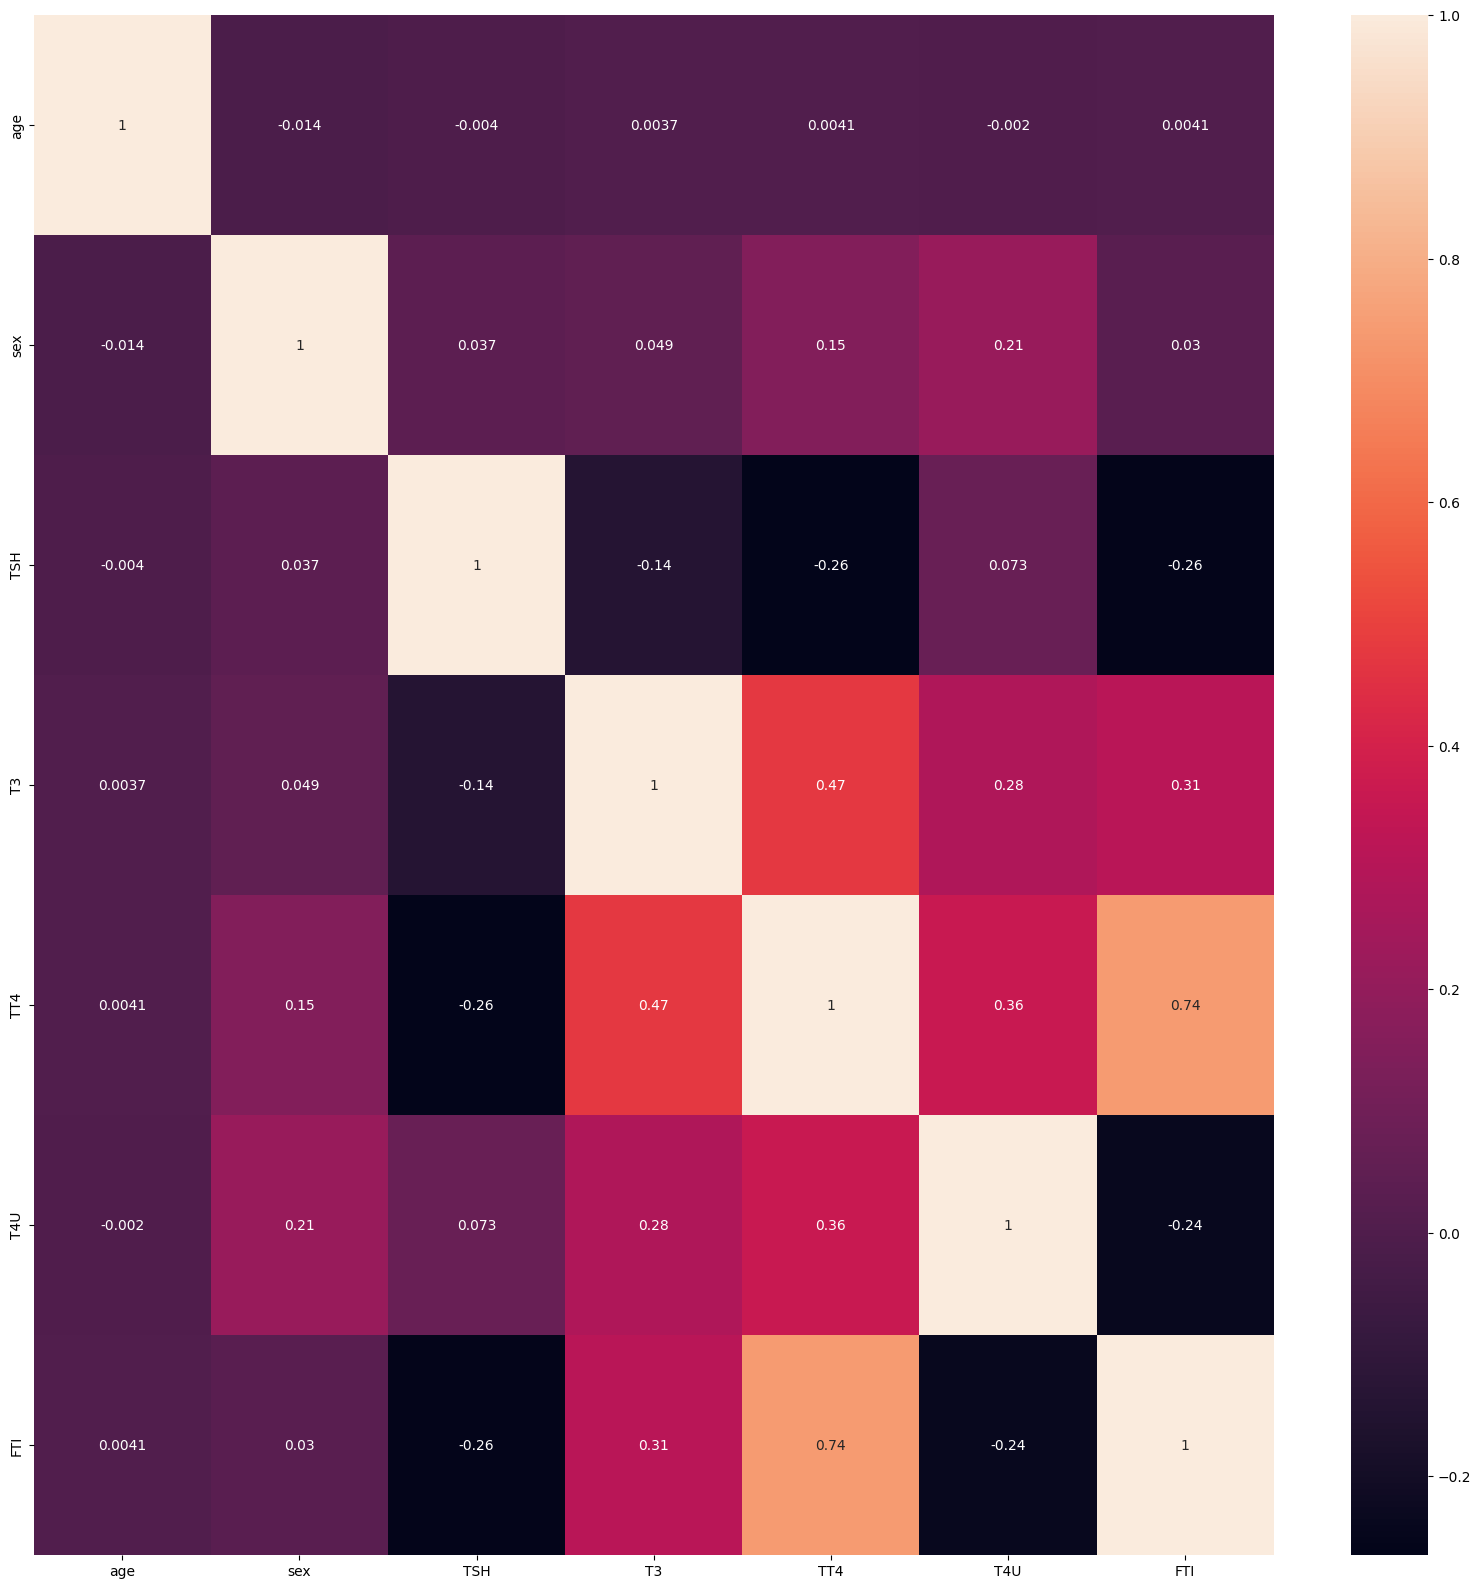

In [25]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

In [26]:
df.corr()

<ipython-input-26-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,sex,TSH,T3,TT4,T4U,FTI
age,1.000000,-0.014175,-0.003979,0.003693,0.004122,-0.002045,0.004108
sex,-0.014175,1.000000,0.036723,0.048890,0.150479,0.214723,0.030149
TSH,-0.003979,0.036723,1.000000,-0.136613,-0.264756,0.072962,-0.257901
T3,0.003693,0.048890,-0.136613,1.000000,0.471792,0.281336,0.312401
TT4,0.004122,0.150479,-0.264756,0.471792,1.000000,0.362280,0.738279
T4U,-0.002045,0.214723,0.072962,0.281336,0.362280,1.000000,-0.238927
FTI,0.004108,0.030149,-0.257901,0.312401,0.738279,-0.238927,1.000000


In [27]:
# we can't find corr for all variable because some of the features are in categorial object so we want to do label encoder

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [28]:
cols = df.select_dtypes(include=['object'])

In [29]:
for i in cols.columns:
    try:
        df[i] = le.fit_transform(df[i])
    except:
        continue

In [30]:
# now we can see their is correlation in some features
for a in range(len(df.corr())):
    for b in range(a):
        if((df.corr().iloc[a,b]) >= 0.7):
            print(df.corr().columns[b])

TT4


In [31]:
# so TT4 has high correlation among all we can remove

df.drop('TT4',axis=1,inplace=True)

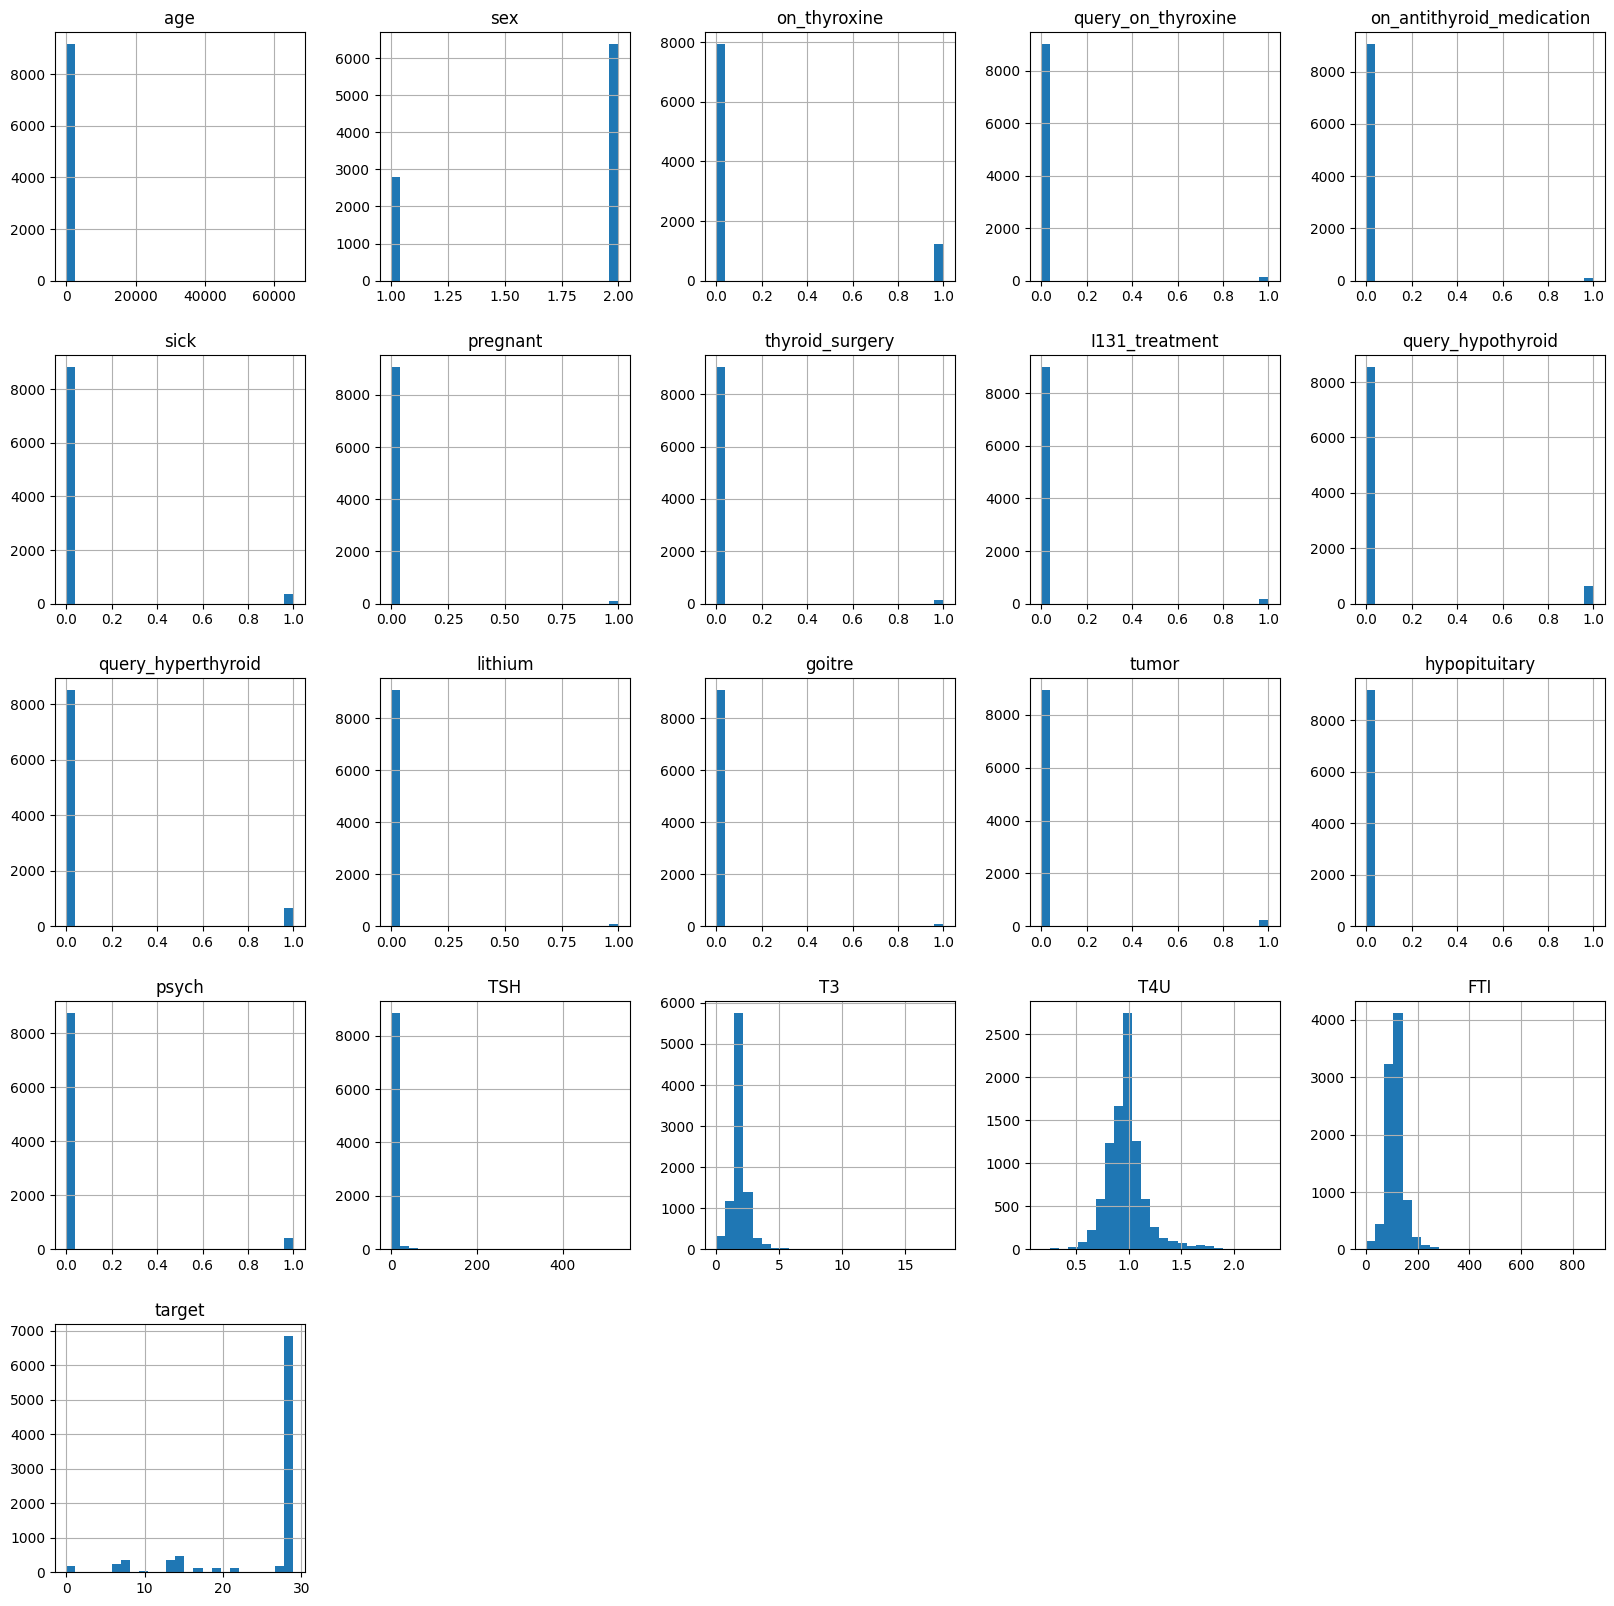

In [32]:
df.hist(bins=25,figsize=(20,20));

### Now we can see the data normally distributed in some features and some are categorigal now we have to normalize the values
### because most of the values lies between 0 to 500 in x-axis

# preprocessing techniques

In [33]:
# X and Y split

X = df.drop('target',axis=1)
y = df.target
df2 = X # for on-going process without PCA

In [34]:
y.unique() # we can see there is 29 types are present => 29 categorigal values

array([29, 28,  6,  1, 27, 13, 19, 22,  8, 15,  0, 16, 17, 21, 26, 14,  3,
       23, 18, 12,  4, 10, 20, 25,  7,  2,  9, 11, 24,  5])

# PCA Technique

### First we use PCA then see the result then we move to normal modeling(without PCA)

In [35]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)

In [36]:
v = pca.fit_transform(X)

In [37]:
X_pca = pd.DataFrame(data = v, columns = ['component_1', 'component_2', 'component_3', 'component_4', 'component_5', 'component_6', 'component_7', 'component_8', 'component_9', 'component_10'])


In [38]:
X_pca

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10
0,-44.560401,0.768306,-3.539707,-0.060346,-0.278302,0.186705,-0.101526,-0.008343,-0.036863,-0.054012
1,-32.560678,0.005264,-0.001276,0.074488,-0.307936,0.256393,0.767614,-0.459433,0.084921,0.004770
2,-37.560681,0.005585,-0.001597,0.016450,-0.269516,0.186457,-0.105393,-0.006417,-0.037733,-0.052237
3,-41.560681,0.006190,-0.001784,0.016456,-0.269494,0.186463,-0.105379,-0.006425,-0.037736,-0.052238
4,-13.560682,0.001958,-0.000475,0.016418,-0.269653,0.186422,-0.105475,-0.006369,-0.037716,-0.052226
...,...,...,...,...,...,...,...,...,...,...
9166,-17.565725,-35.815558,-7.717545,0.204036,0.670809,0.039462,0.841271,-0.465404,0.039248,-0.003876
9167,-51.562695,-14.304689,-3.086385,0.035777,0.706841,-0.003652,-0.033362,-0.006760,-0.082480,-0.059033
9168,-4.564074,-24.087764,-5.190078,0.128057,0.670897,-0.034908,-0.036777,-0.016309,-0.078404,-0.052621
9169,-26.564217,-25.061240,-5.400598,0.142657,-0.264609,0.156261,-0.103200,-0.012638,-0.039070,-0.054794


In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [40]:
for i in X_pca.columns:
    X_pca[i] = scaler.fit_transform(X_pca[[i]])

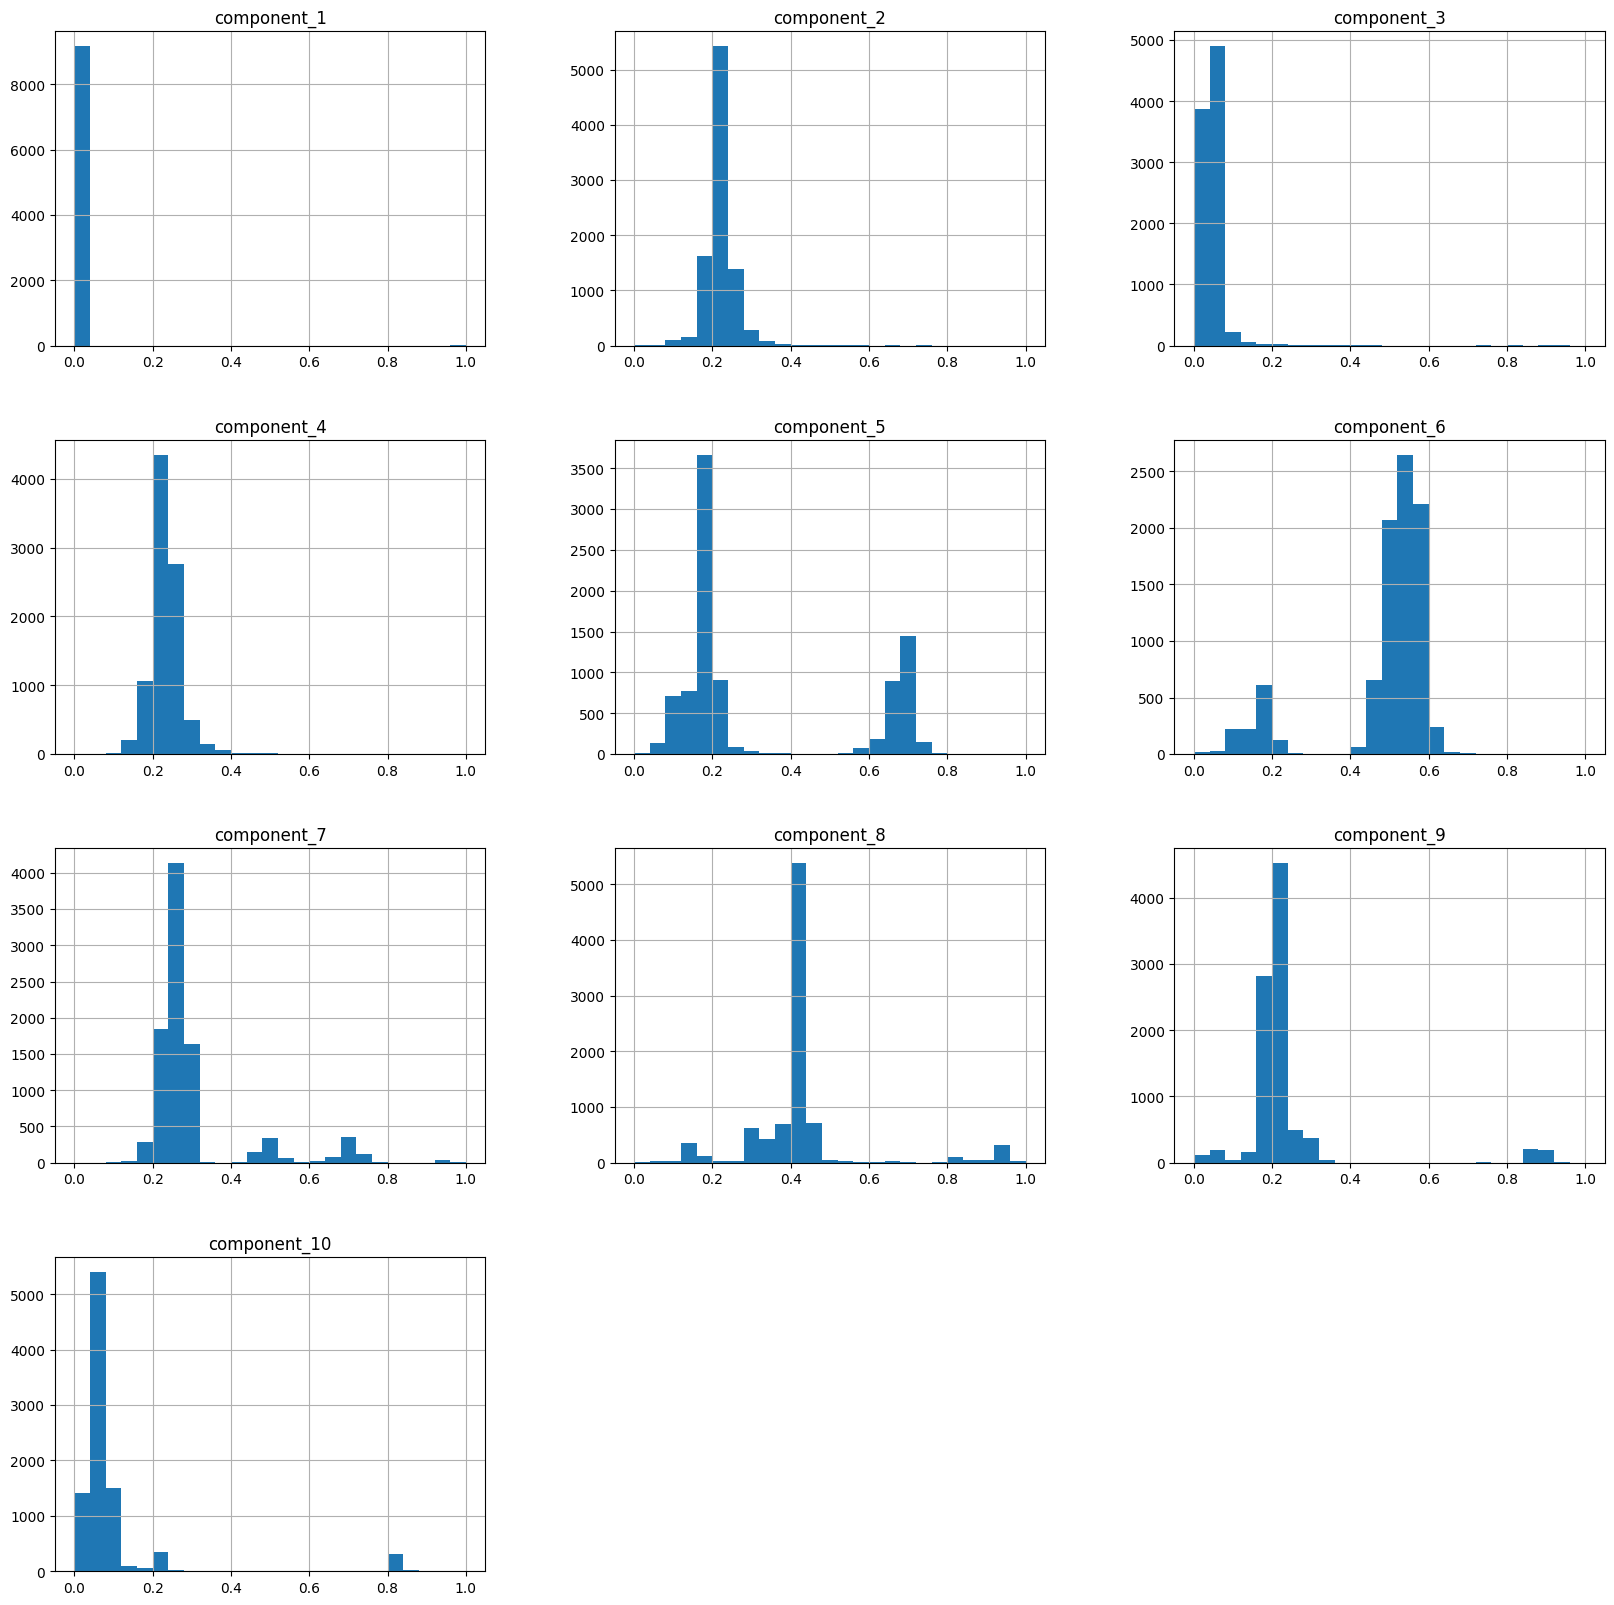

In [41]:
X_pca.hist(bins=25,figsize=(20,20));

In [42]:
X_pca

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10
0,0.000427,0.222139,0.041115,0.232067,0.186966,0.560488,0.248026,0.418244,0.206391,0.048862
1,0.000611,0.221348,0.047978,0.239986,0.171936,0.588608,0.701865,0.147536,0.293047,0.095867
2,0.000534,0.221348,0.047977,0.236577,0.191421,0.560389,0.246007,0.419400,0.205773,0.050282
3,0.000473,0.221349,0.047977,0.236578,0.191433,0.560391,0.246014,0.419395,0.205770,0.050281
4,0.000900,0.221344,0.047979,0.236575,0.191352,0.560374,0.245964,0.419429,0.205785,0.050290
...,...,...,...,...,...,...,...,...,...,...
9166,0.000839,0.184174,0.033012,0.247595,0.668313,0.501074,0.740327,0.143953,0.260548,0.088953
9167,0.000321,0.206497,0.041994,0.237712,0.686587,0.483677,0.283619,0.419193,0.173932,0.044847
9168,0.001038,0.196345,0.037914,0.243132,0.668358,0.471065,0.281836,0.413463,0.176833,0.049974
9169,0.000702,0.195334,0.037506,0.243990,0.193910,0.548204,0.247152,0.415666,0.204821,0.048237


In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_pca,y,test_size=0.33,random_state=42)

# Model Selection

In [45]:
from sklearn.metrics import accuracy_score

## Decision Tree Classifier

In [46]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=3)
clf = tree.fit(X_train,y_train)
treepredict = clf.predict(X_test)

In [47]:
accuracy_score(treepredict,y_test)

0.7961678229269904

# K-NN Classifier

In [49]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
knnclf = neigh.fit(X_train,y_train)
y_pred = knnclf.predict(X_test)

In [50]:
accuracy_score(y_pred,y_test)

0.8420878757846052

# SVM

In [51]:
from sklearn.svm import SVC
svm = SVC(kernel="sigmoid")
sclf = svm.fit(X_train,y_train)
y_pred = sclf.predict(X_test)
accuracy_score(y_pred,y_test)

0.7291047241493228

# logisitic Regression

In [52]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lrclf = lr.fit(X_train,y_train)
y_pred = lrclf.predict(X_test)
accuracy_score(y_pred,y_test)

0.7502477700693756

# Now we can get clear with usage of PCA and now we will see without PCA

In [53]:
df2

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,T4U,FTI
0,29,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.600000,1.900000,0.976056,113.640746
1,41,2.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,5.218993,1.970629,0.976056,113.640746
2,36,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.218993,1.970629,0.976056,113.640746
3,32,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.218993,1.970629,0.976056,113.640746
4,60,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.218993,1.970629,0.976056,113.640746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9166,56,1.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,5.218993,1.970629,0.830000,77.000000
9167,22,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.218993,1.970629,0.920000,99.000000
9168,69,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.218993,1.970629,1.270000,89.000000
9169,47,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.218993,1.970629,0.850000,88.000000


<Axes: >

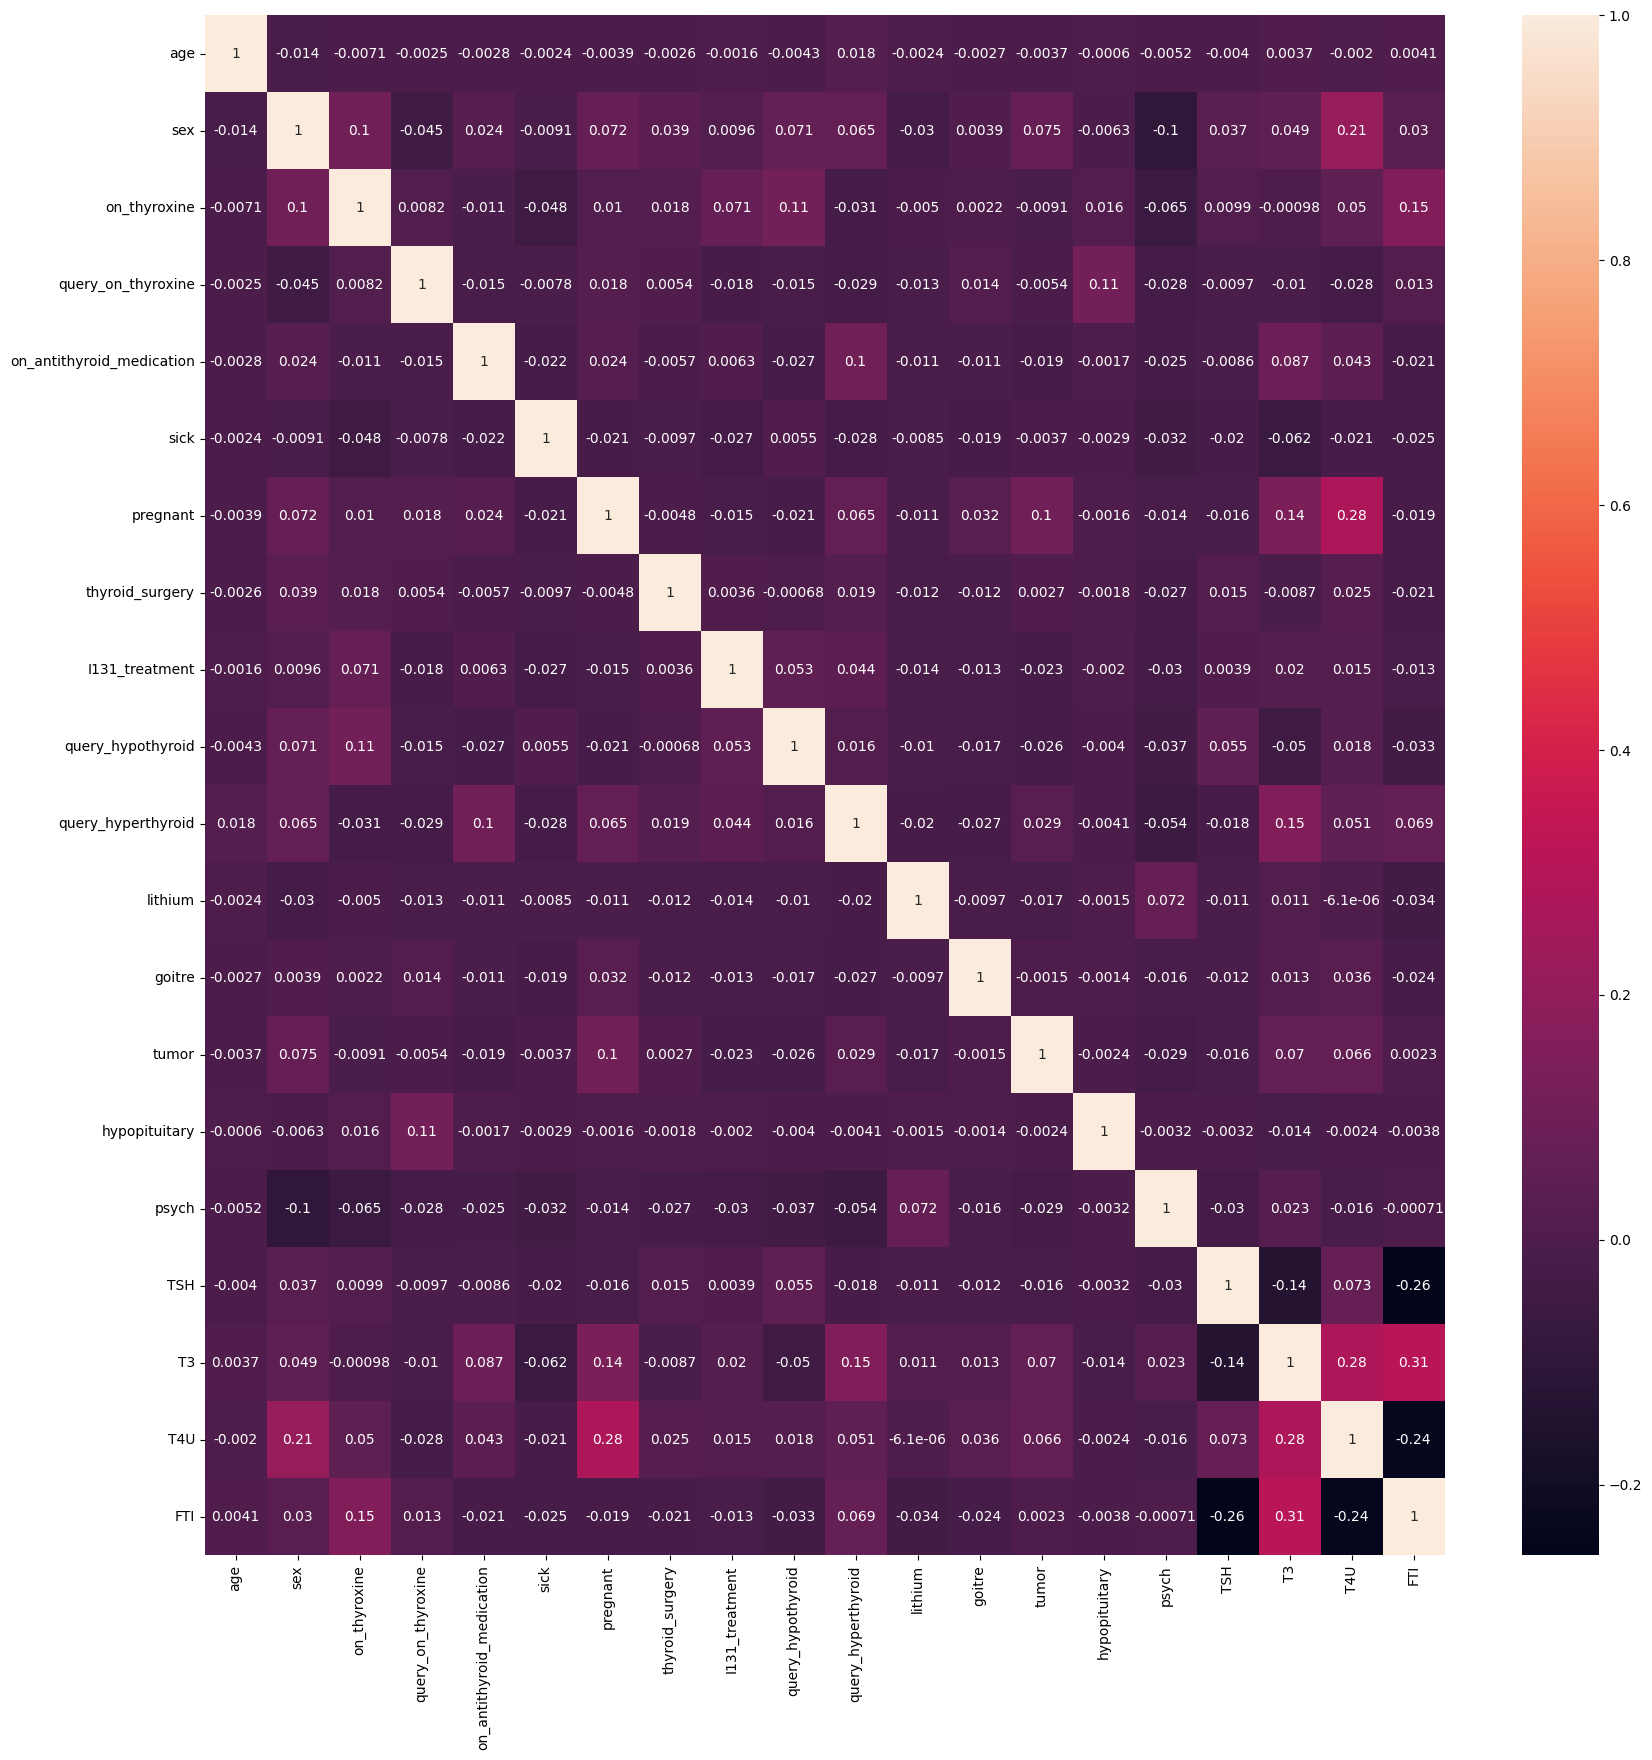

In [54]:
plt.figure(figsize=(20,20))
sns.heatmap(df2.corr(),annot=True)

In [55]:
# there is no so much correlation
# now we can normalize the value
for i in df2.columns:
    print("\n\n")
    print(i)
    print(df2[i].unique())




age
[   29    41    36    32    60    77    28    54    42    51    37    16
    43    63    40    75    56    85    71    67    55    61    46    44
    82    64    70    33    59    53    52    49    35    48    27    69
    76    73    68    66    30    88    38    58    21    45    83    62
    25    86    72    14    15    39    26    20    80    90    23    18
    13    78    24    81    92    57    74     9    47    17    11    50
    34     8    79    31    65    84    12    10    19    22     1     2
    97     6    89    87   455    93     7    91     5    94     4 65511
    95 65512     3 65526]



sex
[2. 1.]



on_thyroxine
[0 1]



query_on_thyroxine
[0 1]



on_antithyroid_medication
[0 1]



sick
[0 1]



pregnant
[0 1]



thyroid_surgery
[0 1]



I131_treatment
[0 1]



query_hypothyroid
[0 1]



query_hyperthyroid
[0 1]



lithium
[0 1]



goitre
[0 1]



tumor
[0 1]



hypopituitary
[0 1]



psych
[0 1]



TSH
[1.60000000e+00 5.21899327e+00 7.00000000e-01 1.200000

In [56]:
cols = ['age','sex','TSH','T3','T4U','FTI']
for i in cols:
    df2[i] = scaler.fit_transform(df2[[i]])

In [57]:
# splitting X and y values

X = df2
y = df['target']

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

# Model Selection

In [59]:
from sklearn.metrics import accuracy_score

# Decision Tree

In [60]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=3)
clf = tree.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_pred,y_test)

0.8457218368021143

# K-NN Classifier

In [62]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
knnclf = neigh.fit(X_train,y_train)
y_pred = knnclf.predict(X_test)
accuracy_score(y_pred,y_test)

0.8186323092170465

# SVM

In [63]:
from sklearn.svm import SVC
svm = SVC(kernel="sigmoid")
sclf = svm.fit(X_train,y_train)
y_pred = sclf.predict(X_test)
accuracy_score(y_pred,y_test)

0.7456227287743641

# logisitic Regression

In [64]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lrclf = lr.fit(X_train,y_train)
y_pred = lrclf.predict(X_test)
accuracy_score(y_pred,y_test)

0.7575156921043937

 Now we can say that with PCA technique we can use KNN because it provides best result as 84% but without PCA with lot of varaible we can use decision tree to get better result you can get some insights by above methods
